In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
%matplotlib inline

In [56]:
# Calculate Distance between any two given points
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)


# Calculate distance from a given point to all other points
# and keep track of the respective classes for those distances
# and eventually return sorted list of distances
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances



# Get the "n" defined neighbours from a list of sorted distances
def get_neighbours(distances, count):
    return distances[:count]




# Takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances,11)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key=op.count)
    return prediction



# Get how accurate our system is based on a new set of test points
# for which we already know the right answer to
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

### Loading the Data

In [57]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
Y = pd.DataFrame(wine.target, columns=['target'])



### Normalizing X 
Y is already only 3 distinct values

In [58]:
X = (X-X.min()) / (X.max()-X.min())

### Splitting the data into Train and test
This is not needed in KNN, it doesn't make sense. We're doing this to understand if we can predict for new values that dont already exist in the data

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [60]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [61]:
f1 = 'alcohol'
f2 = 'hue'
basex = np.array(xtrain[[f1, f2]])
basey = np.array(ytrain['target'])

xtest = np.array(xtest[[f1, f2]])
ytest = np.array(ytest['target'])

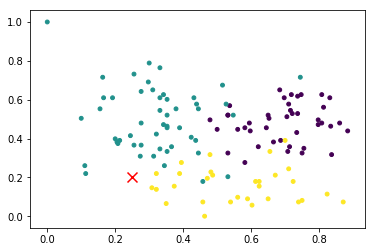

In [62]:
x = pd.DataFrame(basex)
y = basey

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

In [63]:
print(accuracy(basex,basey,xtest,ytest))

Accuracy: 85.18518518518519%
